In [ ]:
pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
import praw

In [ ]:
reddit = praw.Reddit(
    check_for_async=False,
    client_id="V9K4PQfqsHE3iTZDQsi9VQ",
    client_secret="gTG3cHNBm7ZpqBktwXEo_LLrcbRxgA",
    user_agent="testscript by u/rugub",
    username="rugub",
)

In [ ]:
print(reddit.user.me())


None


In [ ]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [ ]:
headlines = set()
for submission in reddit.subreddit('india').hot(limit=None):
 print(submission.title)#Subreddit Title
 print(submission.id) #ID
 print(submission.author) #Author of the subreddit
 print(submission.created_utc) #Date and time being created
 print(submission.score) # Average Score
 print(submission.upvote_ratio) # Upvote ratio
 print(submission.url) # Like to the Subreddit
 break
 headlines.add(submission.title)
print(len(headlines))

Daily Casual Discussion Thread - 1
14bkiss
AutoModerator
1686987017.0
21
0.89
https://www.reddit.com/r/india/comments/14bkiss/daily_casual_discussion_thread_1/
0


In [ ]:
headlines = set()
for submission in reddit.subreddit('india').hot(limit=None):
 headlines.add(submission.title)
print(len(headlines))

594


In [ ]:
india_df = pd.DataFrame(headlines)
india_df.head(25)

,0
0,Hey! Am I the only one here who feels like Jio...
1,Moving back to India from Canada in the month ...
2,What according to you would be the ideal scena...
3,Do locals from Goa hate/despise tourists?
4,Need help with book recommendations
5,I bought Moto G52 and its fps got damaged
6,Club Liberty: A scam?
7,"‘Give up all free services, apologise to Delhi..."
8,I really loved Satya Prem Ki Katha and how it’...
9,Master Chef Answers Indian Food & Curry Questi...


In [ ]:
india_df.columns = ['Titles']
india_df.head()

,Titles
0,Hey! Am I the only one here who feels like Jio...
1,Moving back to India from Canada in the month ...
2,What according to you would be the ideal scena...
3,Do locals from Goa hate/despise tourists?
4,Need help with book recommendations


In [ ]:
india_df.Titles.duplicated().sum() # Duplicate count for Tweet


0

In [ ]:
def cleanTxt(text):
 text = re.sub(r'@[A-Za-z0–9]+', '', text) #Remove @mentions replace with blank
 text = re.sub(r'#', '', text) #Remove the ‘#’ symbol, replace with blank
 text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
 text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
 text = re.sub(r':', '', text) # Remove :
 return text
#Cleaning the text
india_df['Titles']= india_df['Titles'].apply(cleanTxt)
#Show the clean text
india_df.head()

,Titles
0,Hey! Am I the only one here who feels like Jio...
1,Moving back to India from Canada in the month ...
2,What according to you would be the ideal scena...
3,Do locals from Goa hate/despise tourists?
4,Need help with book recommendations


In [ ]:
import re

def remove_emoji(string):
    emoji_pattern = re.compile(r"["
        u"\U0001F600-\U0001F64F" # emoticons
        u"\U0001F300-\U0001F5FF" # symbols & pictographs
        u"\U0001F680-\U0001F6FF" # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" # flags (iOS)
        u"\U00002500-\U00002BEF" # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f" # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub('', string)

# Cleaning the text
india_df["Titles"] = india_df["Titles"].apply(remove_emoji)

# Show the clean text
india_df.head()


,Titles
0,Hey! Am I the only one here who feels like Jio...
1,Moving back to India from Canada in the month ...
2,What according to you would be the ideal scena...
3,Do locals from Goa hate/despise tourists?
4,Need help with book recommendations


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):
 return TextBlob(text).sentiment.subjectivity
#Create a function to get Polarity
def getPolarity(text):
 return TextBlob(text).sentiment.polarity
#Now we create a new column for what we just did and add it to the Tweet_df dataframe
india_df['Subjectivity'] = india_df['Titles'].apply(getSubjectivity)
india_df['Polarity'] = india_df['Titles'].apply(getPolarity)
#Now display data
india_df.head(100)

,Titles,Subjectivity,Polarity
0,Hey! Am I the only one here who feels like Jio...,0.800000,-0.150000
1,Moving back to India from Canada in the month ...,0.000000,0.000000
2,What according to you would be the ideal scena...,0.975000,0.825000
3,Do locals from Goa hate/despise tourists?,0.000000,0.000000
4,Need help with book recommendations,0.000000,0.000000
...,...,...,...
95,Inconsistent friendships,0.000000,0.000000
96,Advise for sales job,0.000000,0.000000
97,I bought a moto phone but Flipkart ditched me....,0.000000,0.000000
98,Maharashtra State and Gogoro Inc. Announce $1....,0.642857,0.214286


In [ ]:
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

india_df["Insight"] = india_df["Polarity"].apply(getInsight)
india_df.head(50)


,Titles,Subjectivity,Polarity,Insight
0,Hey! Am I the only one here who feels like Jio...,0.800000,-0.150000,Negative
1,Moving back to India from Canada in the month ...,0.000000,0.000000,Neutral
2,What according to you would be the ideal scena...,0.975000,0.825000,Positive
3,Do locals from Goa hate/despise tourists?,0.000000,0.000000,Neutral
4,Need help with book recommendations,0.000000,0.000000,Neutral
5,I bought Moto G52 and its fps got damaged,0.000000,0.000000,Neutral
6,Club Liberty A scam?,0.000000,0.000000,Neutral
7,"‘Give up all free services, apologise to Delhi...",0.800000,0.400000,Positive
8,I really loved Satya Prem Ki Katha and how it’...,0.800000,0.700000,Positive
9,Master Chef Answers Indian Food & Curry Questi...,0.000000,0.000000,Neutral


In [ ]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

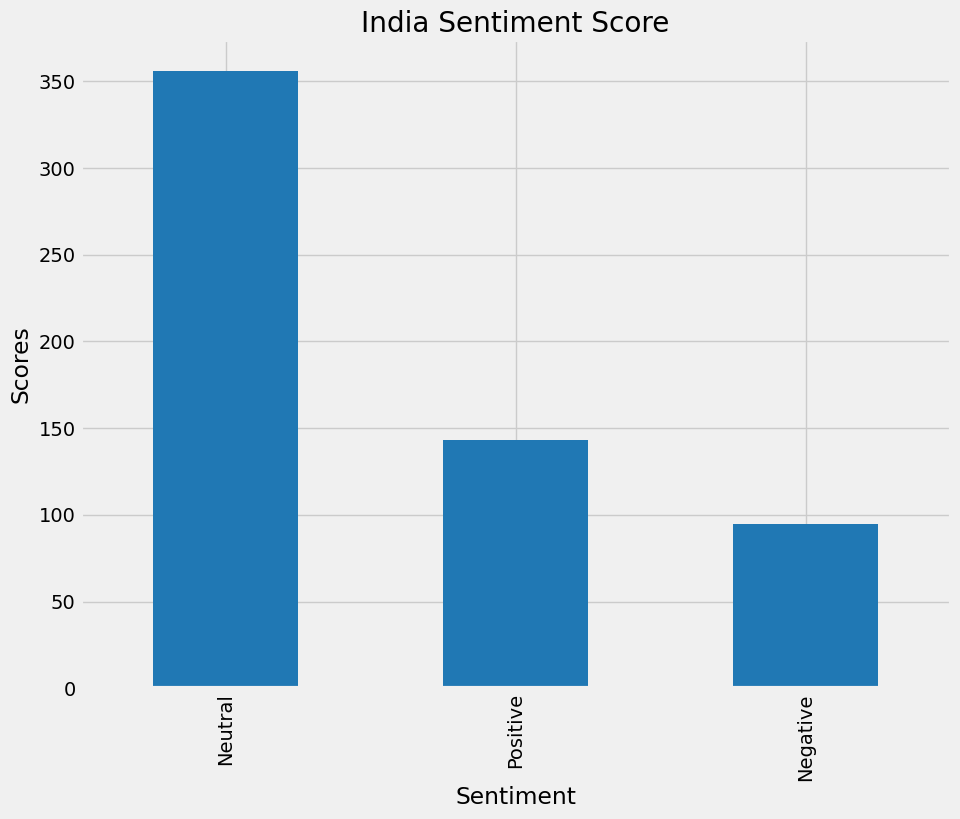

In [ ]:
plt.title("India Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
india_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

In [ ]:
stopwords = STOPWORDS
print(stopwords)

{'was', 'the', 'their', "we'll", "i'd", 'until', "i'll", 'with', 'because', "here's", "he's", 'otherwise', 'just', 'ever', 'up', "what's", "where's", 'above', 'were', 'or', 'few', 'those', 'are', 'against', 'on', "she'd", 'them', "there's", "wasn't", "couldn't", "shouldn't", "they're", "aren't", 'else', 'than', 'further', 'himself', "mustn't", 'for', 'this', 'http', "she'll", 'hers', 'same', "hasn't", 'which', "he'll", "i've", 'by', 'a', 'an', 'down', 'can', 'doing', 'having', 'had', 'to', "it's", "when's", 'no', 'into', "she's", 'am', 'not', "that's", "they've", 'yours', 'do', "don't", 'therefore', 'whom', 'own', 'we', 'over', 'should', 'both', 'her', "doesn't", 'themselves', 'only', 'since', 'such', "they'd", 'most', 'before', 'they', 'as', 'all', 'however', 'get', 'him', 'our', 'these', "haven't", 'be', 'some', 'during', 'between', 'com', 'itself', 'there', 'hence', "he'd", 'what', 'k', "hadn't", 'if', "won't", 'www', 'also', 'so', 'herself', 'ours', "isn't", 'each', 'of', 'its', 'a

(-0.5, 999.5, 599.5, -0.5)

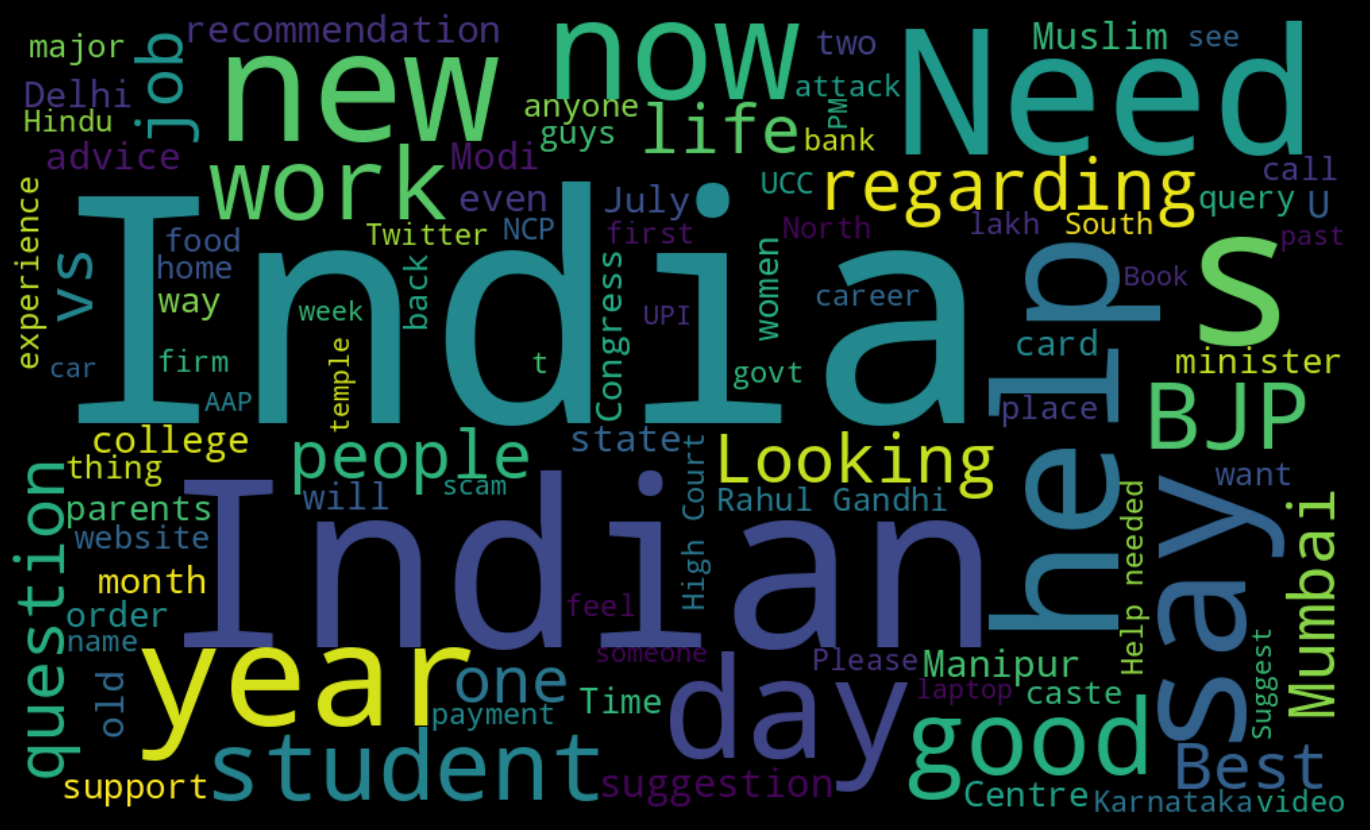

In [ ]:
text = ' '.join([twts for twts in india_df['Titles']])  # To join all tweets

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600,
                      max_words=100,
                      stopwords=stopwords,
                      background_color='black').generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
